In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/car_price_prediction.csv")
print(df.head())
print(df.info())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1   

In [3]:
df.columns = [col.strip().replace(' ', '_').replace('.', '').lower() for col in df.columns]
print(df.head())
print(df.info())


         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

  leather_interior fuel_type engine_volume    mileage  cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tipt

In [4]:
print(df.isnull().sum())
print(df['leather_interior'].unique())

id                  0
price               0
levy                0
manufacturer        0
model               0
prod_year           0
category            0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
gear_box_type       0
drive_wheels        0
doors               0
wheel               0
color               0
airbags             0
dtype: int64
['Yes' 'No']


In [5]:
print(df.columns.tolist())
# df = df.drop(['id'], axis=1)
print(df.head())


['id', 'price', 'levy', 'manufacturer', 'model', 'prod_year', 'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage', 'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color', 'airbags']
         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

  leather_interior fuel_type engine_volume    mileage  cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4       

In [6]:
print(df['leather_interior'].unique())
df['leather_interior'] = df['leather_interior'].map({'Yes': 1, 'No': 0})
print(df.head())
print(df['leather_interior'].unique())

['Yes' 'No']
         id  price  levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     -        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862         FORD   Escape       2011       Jeep   
4  45809263  11726   446        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type engine_volume    mileage  cylinders  \
0                 1    Hybrid           3.5  186005 km        6.0   
1                 0    Petrol             3  192000 km        6.0   
2                 0    Petrol           1.3  200000 km        4.0   
3                 1    Hybrid           2.5  168966 km        4.0   
4                 1    Petrol           1.3   91901 km        4.0   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver   

In [7]:
df['levy'] = df['levy'].replace('-', np.nan)
df['levy'] = df['levy'].str.replace(',', '').astype(float)
df['mileage'] = df['mileage'].astype(str).str.replace(' km', '', regex=False).str.replace(',', '', regex=False).astype(int)
df['engine_volume'] = df['engine_volume'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)
print(df.head())

         id  price    levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399.0        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018.0    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     NaN        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862.0         FORD   Escape       2011       Jeep   
4  45809263  11726   446.0        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type  engine_volume  mileage  cylinders  \
0                 1    Hybrid            3.5   186005        6.0   
1                 0    Petrol            3.0   192000        6.0   
2                 0    Petrol            1.3   200000        4.0   
3                 1    Hybrid            2.5   168966        4.0   
4                 1    Petrol            1.3    91901        4.0   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12 

In [8]:
#Zmiana zmiennych tekstowych
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
print(cat_cols)

Index(['manufacturer', 'model', 'category', 'fuel_type', 'gear_box_type',
       'drive_wheels', 'doors', 'wheel', 'color'],
      dtype='object')


In [9]:
print(df.head())
print(df.info())

         id  price    levy manufacturer    model  prod_year   category  \
0  45654403  13328  1399.0        LEXUS   RX 450       2010       Jeep   
1  44731507  16621  1018.0    CHEVROLET  Equinox       2011       Jeep   
2  45774419   8467     NaN        HONDA      FIT       2006  Hatchback   
3  45769185   3607   862.0         FORD   Escape       2011       Jeep   
4  45809263  11726   446.0        HONDA      FIT       2014  Hatchback   

   leather_interior fuel_type  engine_volume  mileage  cylinders  \
0                 1    Hybrid            3.5   186005        6.0   
1                 0    Petrol            3.0   192000        6.0   
2                 0    Petrol            1.3   200000        4.0   
3                 1    Hybrid            2.5   168966        4.0   
4                 1    Petrol            1.3    91901        4.0   

  gear_box_type drive_wheels   doors             wheel   color  airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12 

Statystyki opisowe dla zmiennych ilościowych

In [10]:
quantitative_cols = ['price', 'levy','prod_year','leather_interior', 'engine_volume', 'mileage', 'cylinders', 'airbags']

valid_quant_cols = [col for col in quantitative_cols if df[col].notna().any()]

df_stats = df[valid_quant_cols].describe().T

df_stats['mode'] = [
    df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
    for col in df_stats.index
]

df_stats = df_stats.rename(columns={
    'count': 'liczba',
    'mean': 'średnia',
    'std': 'odchylenie_std',
    'min': 'minimum',
    '25%': 'Q1',
    '50%': 'mediana',
    '75%': 'Q3',
    'max': 'maksimum'
})

df_stats['wariancja'] = df[df_stats.index].var()

pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df_stats[['liczba', 'średnia', 'mediana', 'mode', 'minimum', 'maksimum', 'odchylenie_std', 'wariancja']],"\n")

                   liczba    średnia   mediana     mode  minimum  \
price            19237.00   18555.93  13172.00 15681.00     1.00   
levy             13418.00     906.84    781.00   765.00    87.00   
prod_year        19237.00    2010.91   2012.00  2012.00  1939.00   
leather_interior 19237.00       0.73      1.00     1.00     0.00   
engine_volume    19237.00       2.31      2.00     2.00     0.00   
mileage          19237.00 1532235.69 126000.00     0.00     0.00   
cylinders        19237.00       4.58      4.00     4.00     1.00   
airbags          19237.00       6.58      6.00     4.00     0.00   

                      maksimum  odchylenie_std           wariancja  
price              26307500.00       190581.27      36321220354.37  
levy                  11714.00          461.87           213321.17  
prod_year              2020.00            5.67               32.13  
leather_interior          1.00            0.45                0.20  
engine_volume            20.00            

In [11]:
print(df['leather_interior'].value_counts())

leather_interior
1    13954
0     5283
Name: count, dtype: int64


Tabela liczności dla zmiennych jakościowych


In [12]:
#Zmienna zależna w h1
target_col = 'price'

qualitative_cols = df.select_dtypes(include='object').columns.tolist()
for col in qualitative_cols:
    print(f"\nLiczność dla zmiennej: {col}")
    print(df[col].value_counts())
    print("-" * 40)


Liczność dla zmiennej: manufacturer
manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64
----------------------------------------

Liczność dla zmiennej: model
model
Prius              1083
Sonata             1079
Camry               938
Elantra             922
E 350               542
                   ... 
530 i                 1
E 500 AVG             1
Vito Extralong        1
C 240 W 203           1
Vito Exstralong       1
Name: count, Length: 1590, dtype: int64
----------------------------------------

Liczność dla zmiennej: category
category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limous

Tabela wielodzielcza

In [13]:
pivot = pd.crosstab(df['manufacturer'], df['fuel_type'])
print("\nTabela wielodzielcza: manufacturer vs fuel_type")
print(pivot)


Tabela wielodzielcza: manufacturer vs fuel_type
fuel_type     CNG  Diesel  Hybrid  Hydrogen  LPG  Petrol  Plug-in Hybrid
manufacturer                                                            
ACURA           0       0       0         0    0      15               0
ALFA ROMEO      0       0       0         0    0       4               0
ASTON MARTIN    0       0       0         0    0       1               0
AUDI            2      25       2         0    0     226               0
BENTLEY         0       0       0         0    0       2               0
...           ...     ...     ...       ...  ...     ...             ...
VAZ             5       1       0         0    0      42               0
VOLKSWAGEN     42     100       8         0   13     416               0
VOLVO           1       1       0         0    0      17               0
ZAZ             0       0       0         0    0       2               0
სხვა            0       1       0         0    0       1               0

[

In [14]:
pivot = pd.crosstab(df['drive_wheels'], df['gear_box_type'])
print("\nTabela wielodzielcza: drive_wheels vs gear_box_type")
print(pivot)


Tabela wielodzielcza: drive_wheels vs gear_box_type
gear_box_type  Automatic  Manual  Tiptronic  Variator
drive_wheels                                         
4x4                 2861     212        921        64
Front               9772     980       1446       676
Rear                 881     683        735         6


In [15]:
pivot = pd.crosstab(df['category'], df['doors'])
print("\nTabela wielodzielcza: category vs doors")
print(pivot)


Tabela wielodzielcza: category vs doors
doors        02-Mar  04-May  >5
category                       
Cabriolet        26      10   0
Coupe           367     164   1
Goods wagon      53     174   6
Hatchback        79    2757  11
Jeep             84    5352  37
Limousine         0      11   0
Microbus         82     207  17
Minivan          15     609  23
Pickup            5      46   1
Sedan            61    8644  31
Universal         5     358   1


Histogramy skategoryzowane

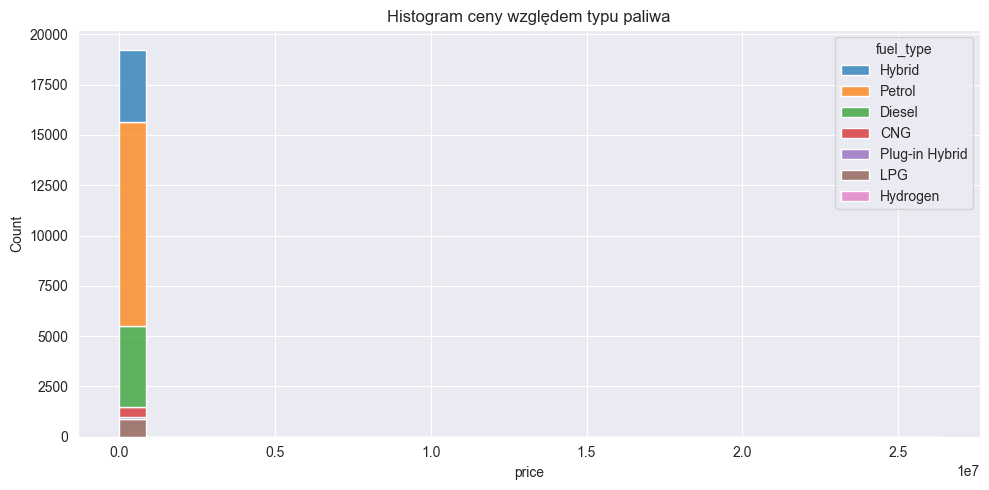

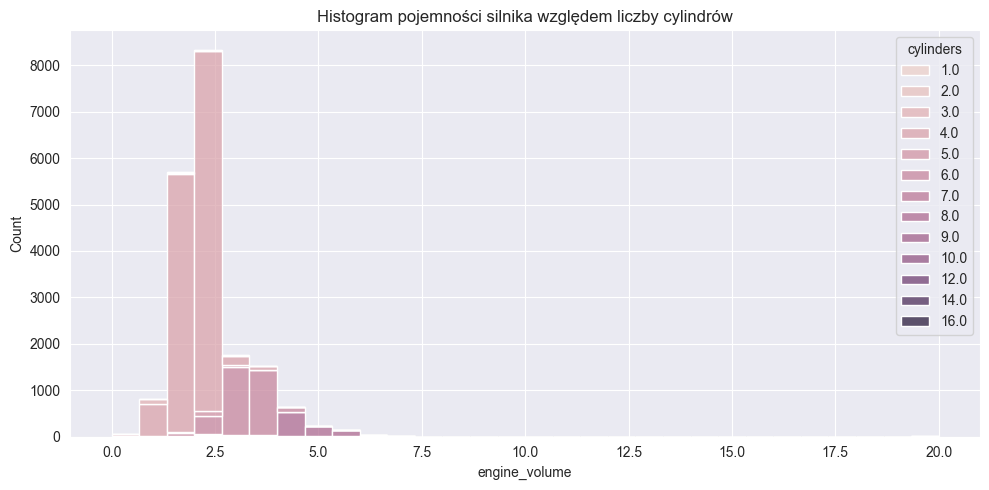

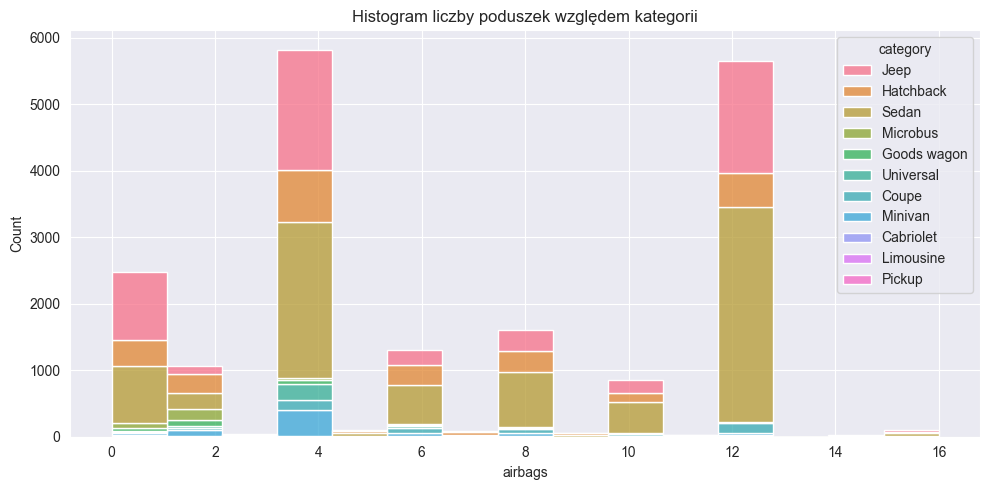

In [16]:
#Konwersja zmiennych
df = df.applymap(lambda x: str(x) if isinstance(x, str) else x)

#Histogramy skategoryzowane

#price względem fuel_type
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price', hue='fuel_type', multiple='stack', bins=30)
plt.title('Histogram ceny względem typu paliwa')
plt.tight_layout()
plt.show()

#engine_volume względem cylinders
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='engine_volume', hue='cylinders', multiple='stack', bins=30)
plt.title('Histogram pojemności silnika względem liczby cylindrów')
plt.tight_layout()
plt.show()

#airbags względem category
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='airbags', hue='category', multiple='stack', bins=15)
plt.title('Histogram liczby poduszek względem kategorii')
plt.tight_layout()
plt.show()

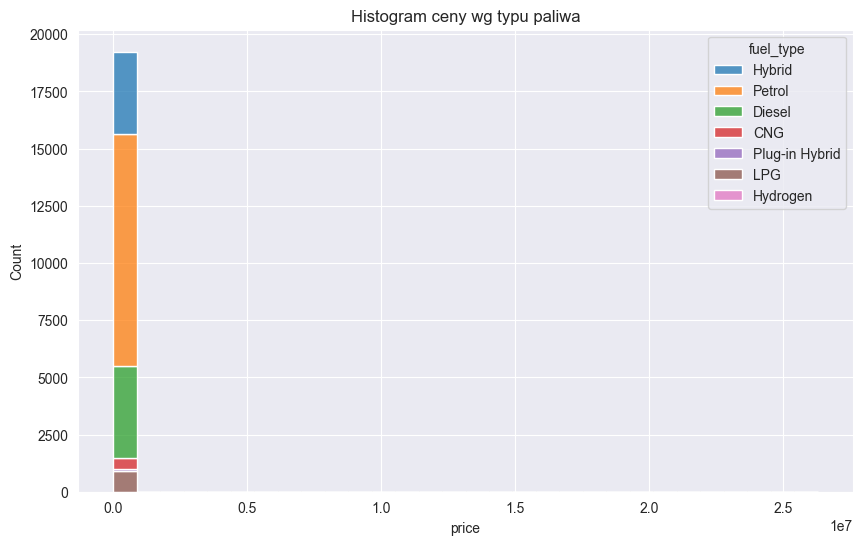

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', hue='fuel_type', multiple='stack', bins=30)
plt.title('Histogram ceny wg typu paliwa')
plt.show()

Wykres średnich w grupach

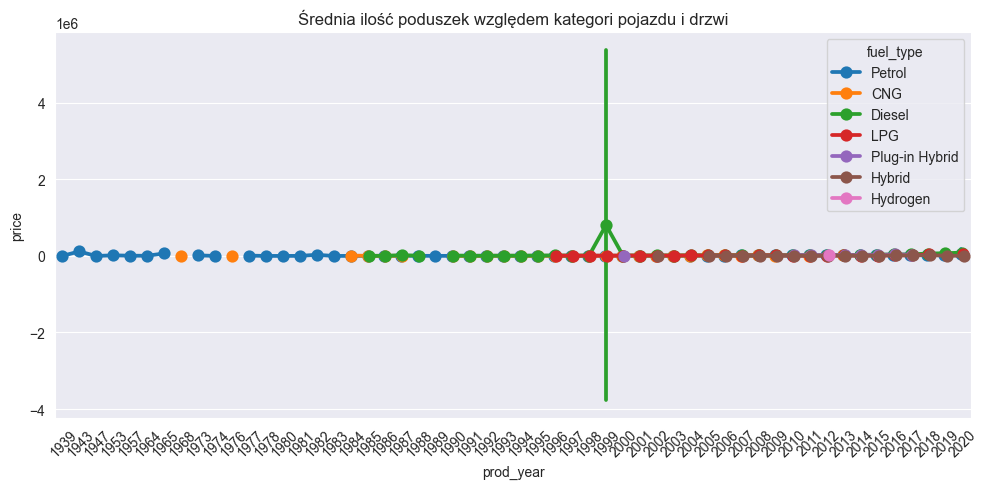

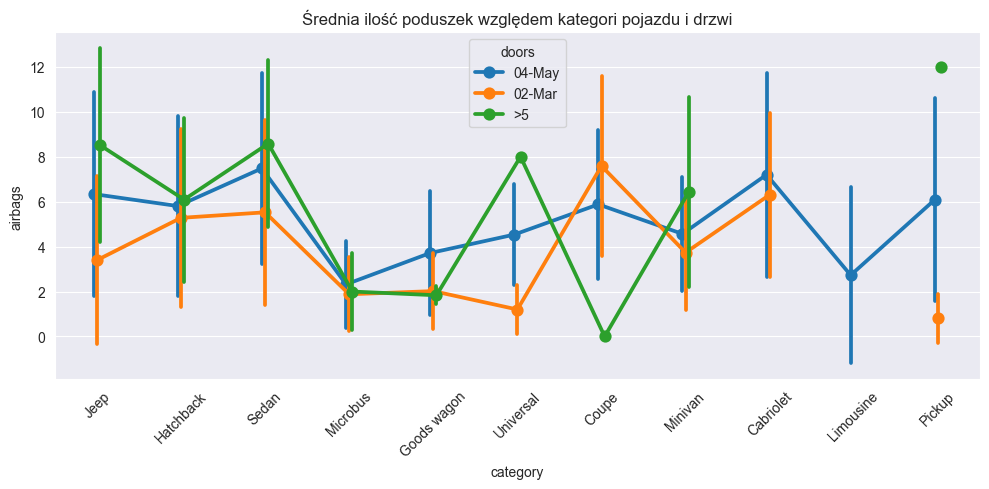

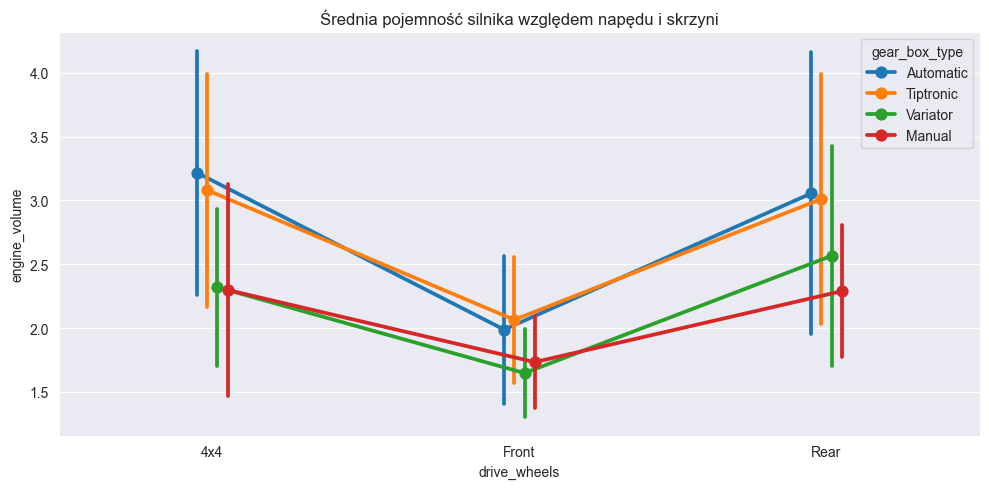

In [18]:
#Wykres średnich w grupach
#prod_year i price
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='prod_year', y='price', hue='fuel_type', ci='sd', dodge=True)
plt.title('Średnia ilość poduszek względem kategori pojazdu i drzwi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#category i airbags
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='category', y='airbags', hue='doors', ci='sd', dodge=True)
plt.title('Średnia ilość poduszek względem kategori pojazdu i drzwi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#drive_wheels i engine_volume
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='drive_wheels', y='engine_volume', hue='gear_box_type', ci='sd', dodge=True)
plt.title('Średnia pojemność silnika względem napędu i skrzyni')
plt.tight_layout()
plt.show()

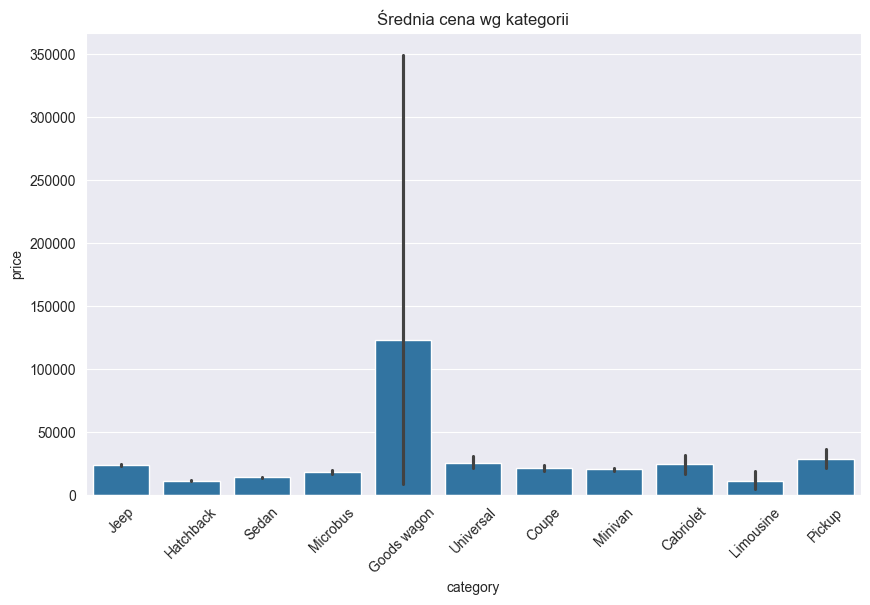

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='category', y='price', estimator='mean')
plt.xticks(rotation=45)
plt.title('Średnia cena wg kategorii')
plt.show()

Macierz korelacji

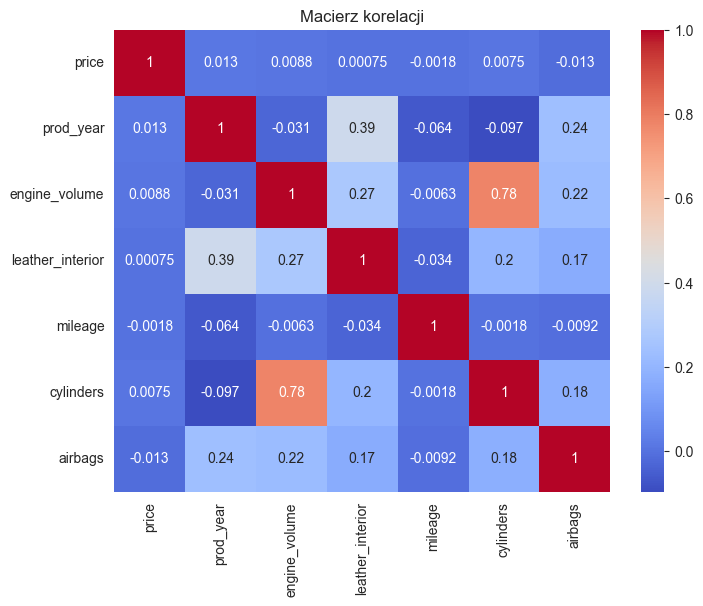

In [20]:
quantitative_cols = ['price','prod_year', 'engine_volume', 'leather_interior', 'mileage', 'cylinders', 'airbags']
corr_matrix = df[quantitative_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

Wykresy ramka- wąsy dla zmiennych ilościowych z hipotez

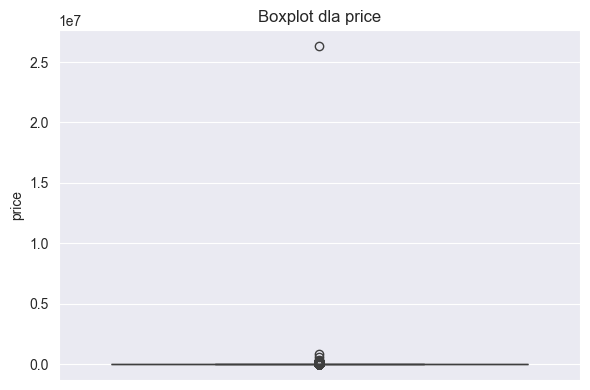

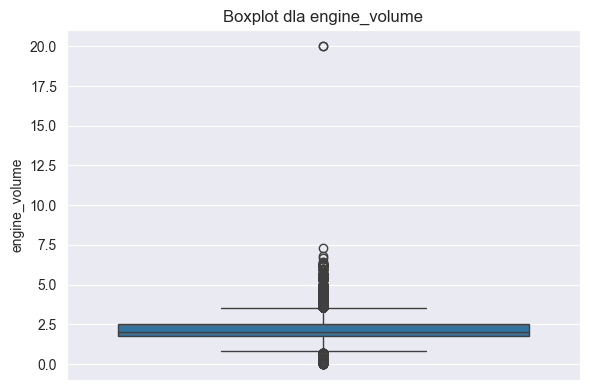

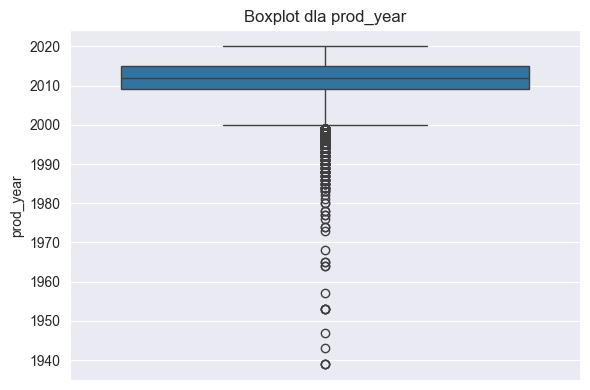

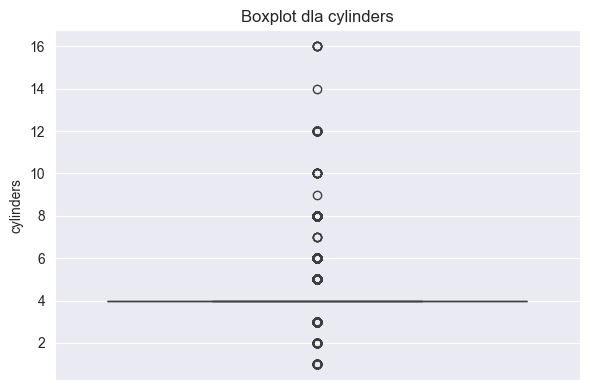

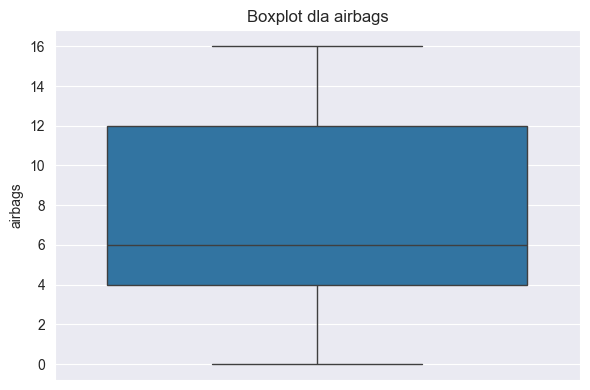

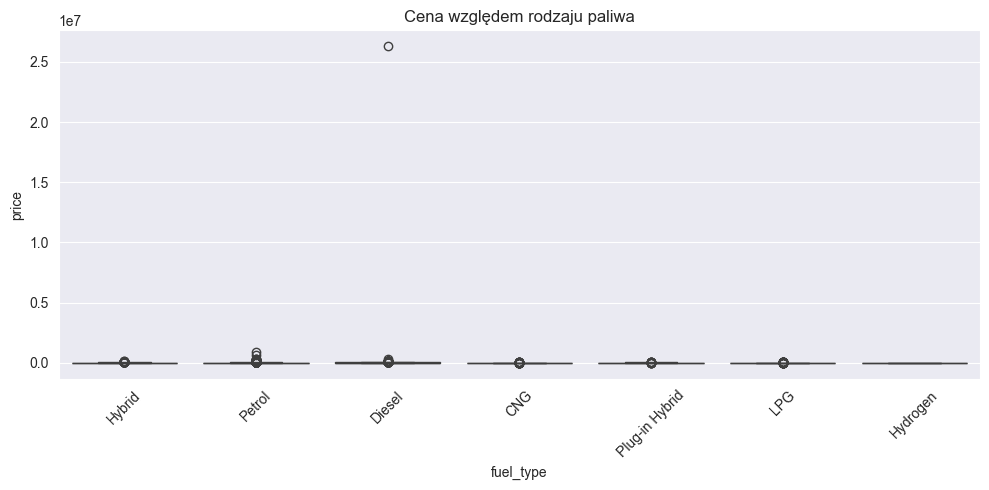

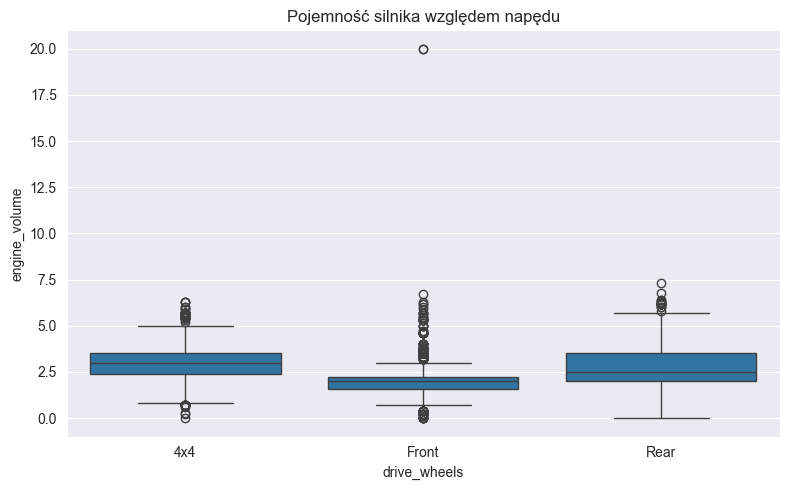

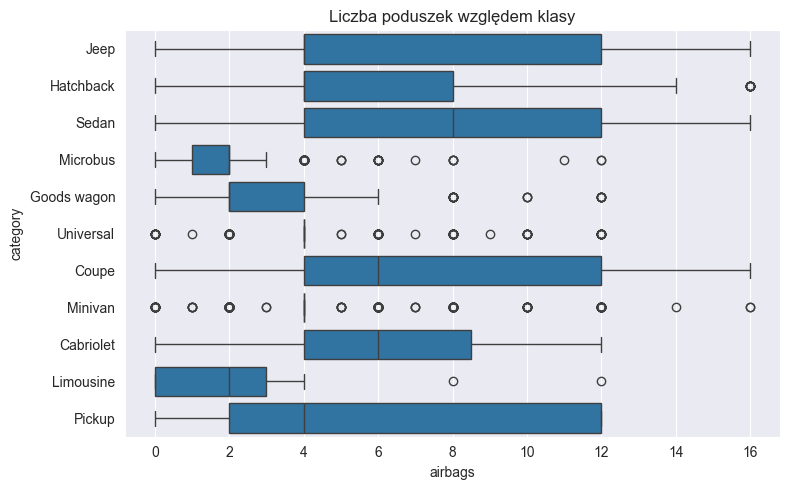

In [21]:
#Wykresy ramka-wąsy

num_vars = ['price', 'engine_volume', 'prod_year', 'cylinders', 'airbags']

for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=var, data=df)
    plt.title(f'Boxplot dla {var}')
    plt.tight_layout()
    plt.show()

#Ramka-wąsy skategoryzowane
#price vs fuel_type
plt.figure(figsize=(10,5))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Cena względem rodzaju paliwa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#engine_volume vs drive_wheels
plt.figure(figsize=(8,5))
sns.boxplot(x='drive_wheels', y='engine_volume', data=df)
plt.title('Pojemność silnika względem napędu')
plt.tight_layout()
plt.show()

#category vs air_bags
plt.figure(figsize=(8,5))
sns.boxplot(x='airbags', y='category', data=df)
plt.title('Liczba poduszek względem klasy')
plt.tight_layout()
plt.show()

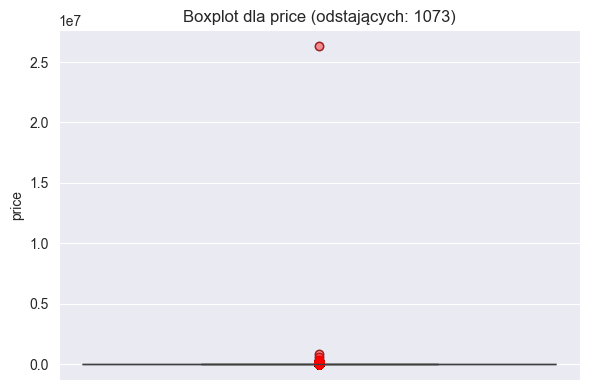

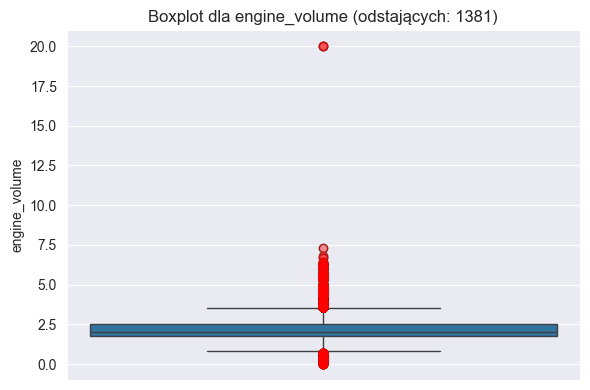

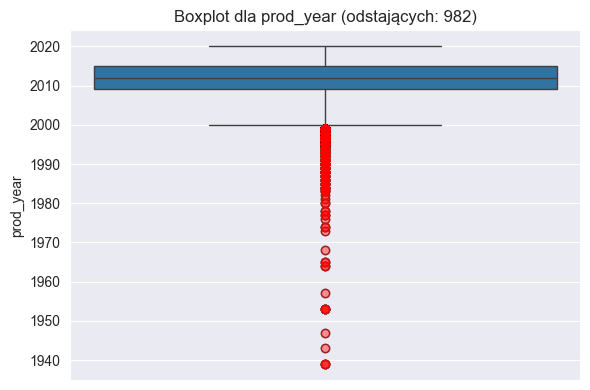

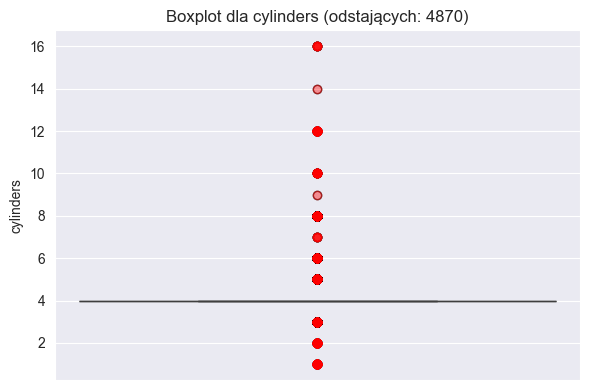

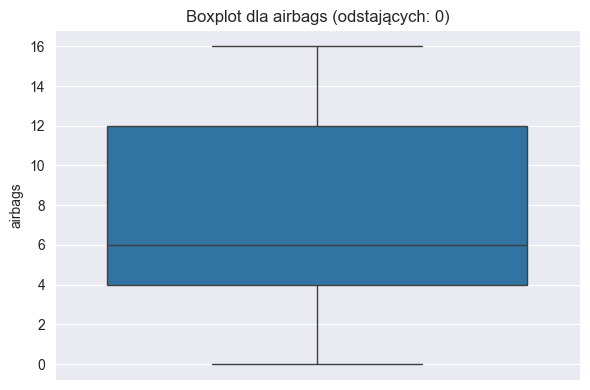

In [22]:
num_vars = ['price', 'engine_volume', 'prod_year', 'cylinders', 'airbags']

for var in num_vars:
    plt.figure(figsize=(6, 4))

    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]

    sns.boxplot(y=var, data=df, showfliers=True)
    plt.title(f'Boxplot dla {var} (odstających: {len(outliers)})')
    for val in outliers:
        plt.plot(0, val, 'ro', alpha=0.4)

    plt.tight_layout()
    plt.show()


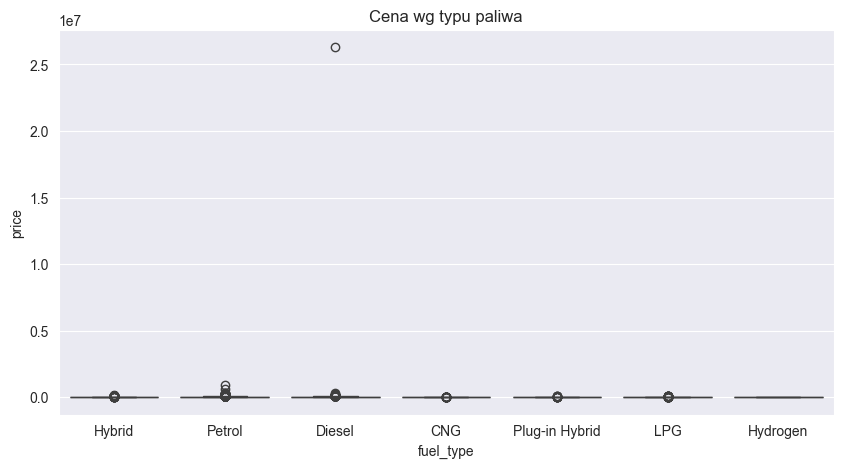

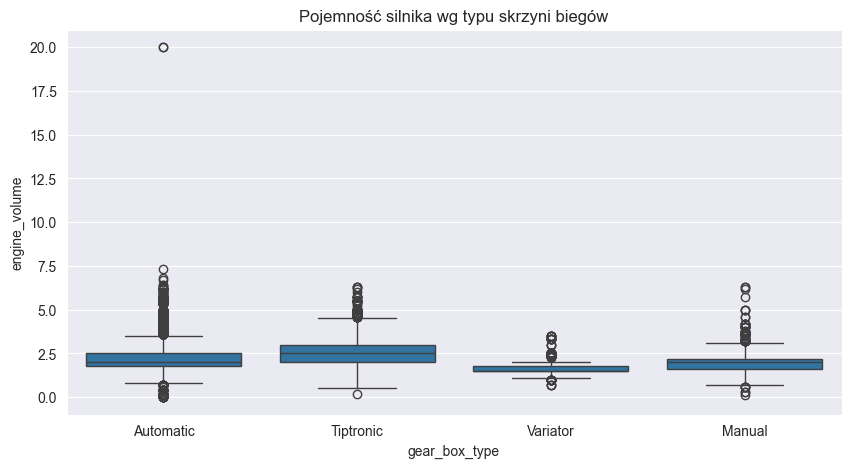

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='fuel_type', y='price')
plt.title('Cena wg typu paliwa')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='gear_box_type', y='engine_volume')
plt.title('Pojemność silnika wg typu skrzyni biegów')
plt.show()

Wykres rozrzutu

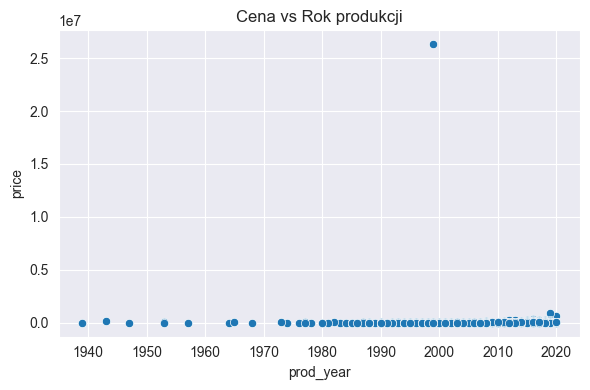

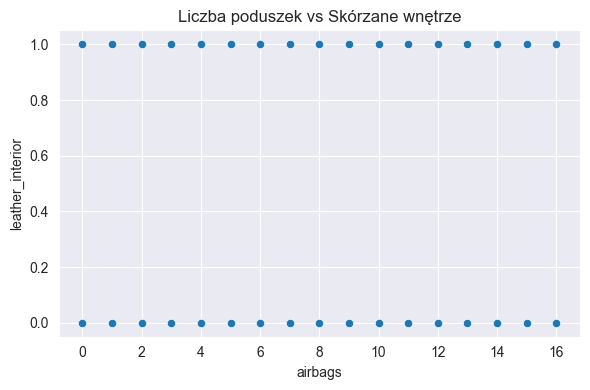

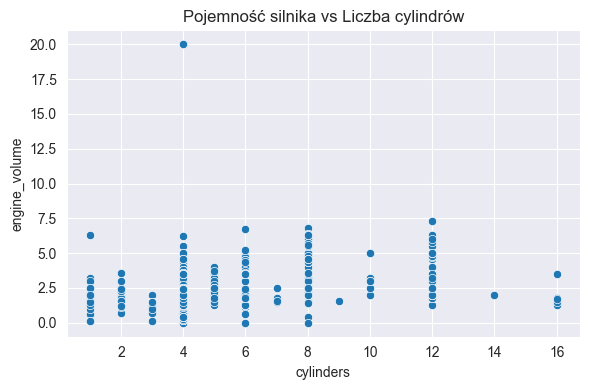

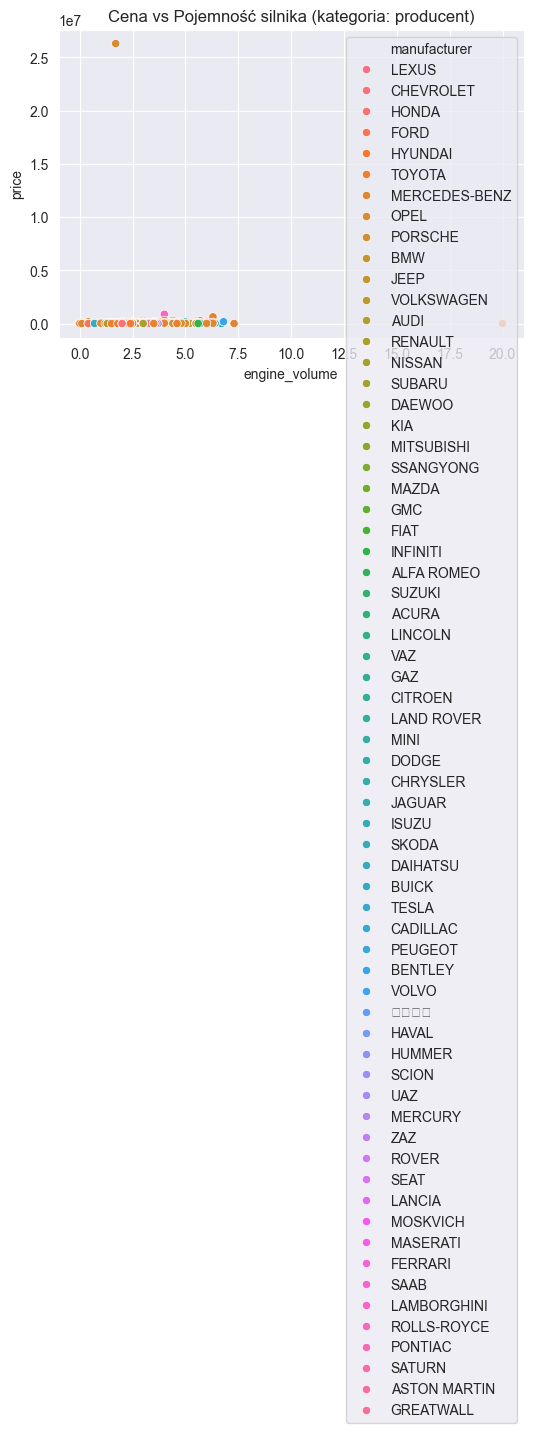

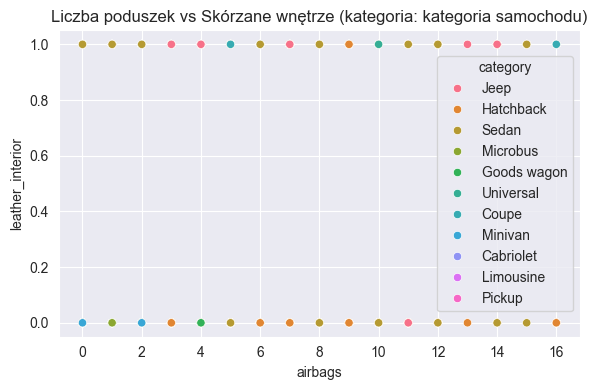

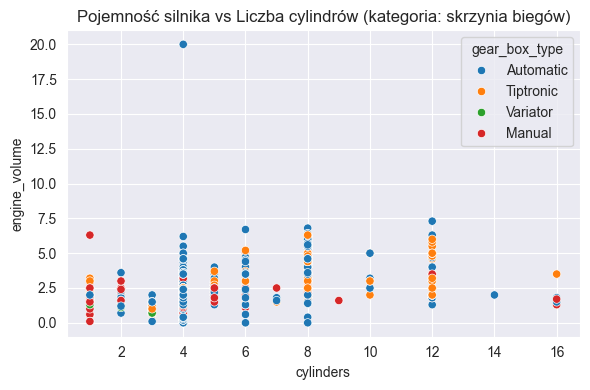

In [24]:
#Wykresy rozrzutu

#price vs prod_year
plt.figure(figsize=(6,4))
sns.scatterplot(x='prod_year', y='price', data=df)
plt.title('Cena vs Rok produkcji')
plt.tight_layout()
plt.show()

#leather_interior vs airbags
plt.figure(figsize=(6,4))
sns.scatterplot(x='airbags', y='leather_interior', data=df)
plt.title('Liczba poduszek vs Skórzane wnętrze')
plt.tight_layout()
plt.show()

#engine_volume vs cylinders
plt.figure(figsize=(6,4))
sns.scatterplot(x='cylinders', y='engine_volume', data=df)
plt.title('Pojemność silnika vs Liczba cylindrów')
plt.tight_layout()
plt.show()

#Wykresy rozrzutu z kategoryzacją
#price vs engine_volume, kategoria: manufacturer
plt.figure(figsize=(6,4))
sns.scatterplot(x='engine_volume', y='price', hue='manufacturer', data=df)
plt.title('Cena vs Pojemność silnika (kategoria: producent)')
plt.tight_layout()
plt.show()

#leather_interior vs airbags, kategoria: category
plt.figure(figsize=(6,4))
sns.scatterplot(x='airbags', y='leather_interior', hue='category', data=df)
plt.title('Liczba poduszek vs Skórzane wnętrze (kategoria: kategoria samochodu)')
plt.tight_layout()
plt.show()

#engine_volume vs cylinders, kategoria: gear_box_type
plt.figure(figsize=(6,4))
sns.scatterplot(x='cylinders', y='engine_volume', hue='gear_box_type', data=df)
plt.title('Pojemność silnika vs Liczba cylindrów (kategoria: skrzynia biegów)')
plt.tight_layout()
plt.show()


## Analiza skupień

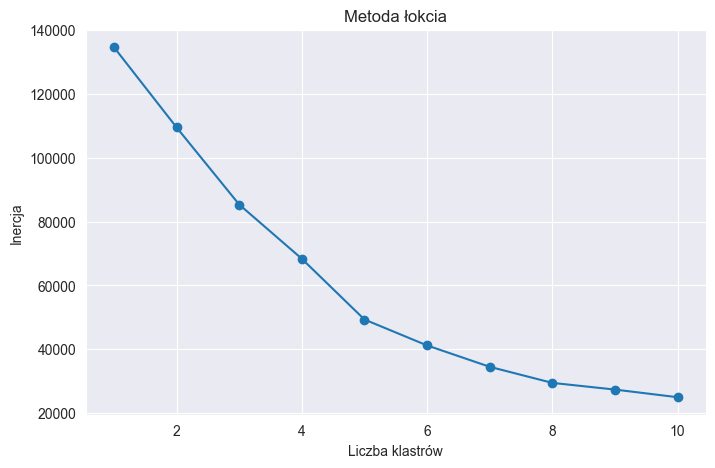

In [25]:
#Zmienne
cluster_cols = ['price', 'engine_volume', 'mileage', 'cylinders', 'airbags', 'prod_year', 'leather_interior']
df_cluster = df[cluster_cols].copy()

df_cluster = df_cluster.dropna()

#Skalowanie
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inercja')
plt.title('Metoda łokcia')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=0)
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

Metoda EM

                  price  engine_volume       mileage  cylinders  airbags  \
KMeans_Cluster                                                             
0              13016.89           1.88     241892.42       4.12     5.35   
1              20861.93           2.00     136528.50       4.02     6.35   
2              20022.39           3.61     200261.69       6.55     8.72   
3               6761.88           2.08 1532043011.76       4.53     5.06   

                prod_year  leather_interior  EM_Cluster  
KMeans_Cluster                                           
0                 2007.16              0.01        0.02  
1                 2013.17              1.00        1.03  
2                 2010.22              0.97        1.94  
3                 1999.24              0.18        0.00  


              price  engine_volume    mileage  cylinders  airbags  prod_year  \
EM_Cluster                                                                     
0          13335.58           1.9

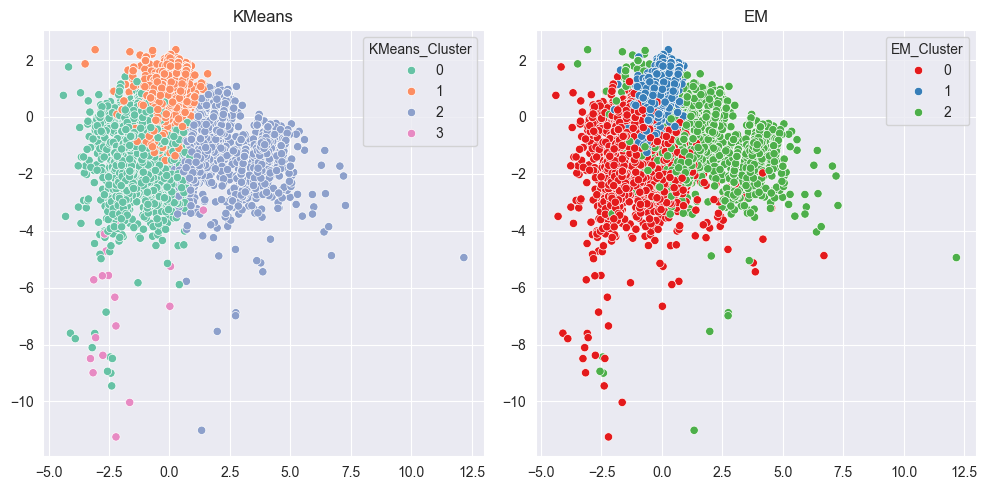

In [26]:
#Analiza skupień metodą EM
gm = GaussianMixture(n_components=3, random_state=0)
df_cluster['EM_Cluster'] = gm.fit_predict(X_scaled)

print(df_cluster.groupby('KMeans_Cluster').mean())
print("\n")
print(df_cluster.groupby('EM_Cluster').mean())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['KMeans_Cluster'], palette='Set2')
plt.title("KMeans")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['EM_Cluster'], palette='Set1')
plt.title("EM")

plt.tight_layout()
plt.show()